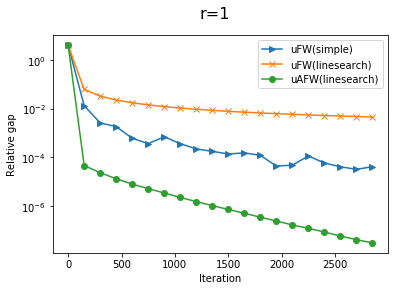

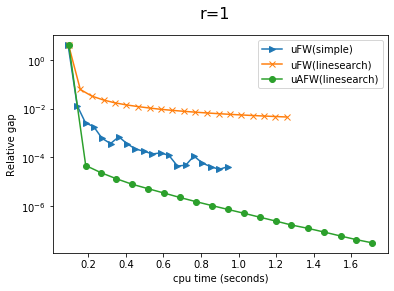

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from Data_generation import generate_data_leastsquare
from Mosek_Leastsquare import Mosek_Leastsquare
from uFW_Leastsquare import uFW_Leastsquare
from uAFW_Leastsquare import uAFW_Leastsquare



def my_plotting_LeastSquare(Img_ID, r, N, n, relative_delta, relative_sigma, repeat, itermax = 2000):
    #####################################################################
    ## Plot the experiments results on trend filtering with quadratic loss.
    ## All the images are saved in a folder named 'Images'.
    ## 
    ##
    ## Input:
    ##
    ## Img_ID: Int
    ## This parameter is used to give different names when saving the images.
    ##
    ## r: The order of difference for D^(r).
    ##
    ## N: The number of samples.
    ##
    ## n: The number of features.
    ##
    ## relative_delta: Relative value w.r.t. the genrated data beforing noising. (See captions of plotted figures in the latex code).
    ##
    ## relative_sigma: Relative noise level (See captions of plotted figures in the latex code).
    ##
    ## repeat: The number of independent experiments.
    ##
    ## itermax: The total number of iterations for each method.
    ##
    ##
    ####################################################################


    if r == 1:
        delta = relative_delta * 1
        piece_type = 'contant'
    else:
        if r == 2:
            delta = relative_delta * 1
            piece_type = 'linear'

    time_vec11_ave = 0
    time_vec12_ave = 0
    time_vec2_ave = 0

    relative_gap11_ave = 0
    relative_gap12_ave = 0
    relative_gap2_ave = 0



    for j in range(repeat):
        A = np.random.randn(N,n)
        b = generate_data_leastsquare(A, r, N, n, relative_sigma)

        ## Output the cpu time and objective values in each iteration for different methods
        time_cvxpy, cvxpy_opt = Mosek_Leastsquare(r, A, b, delta)

        time_vec11, obj_val11 = uFW_Leastsquare(r, A, b, delta, 'simple', itermax=itermax)
        time_vec12, obj_val12 = uFW_Leastsquare(r, A, b, delta, 'linesearch', itermax=itermax)
        time_vec2, obj_val2 = uAFW_Leastsquare(r, A, b, delta, itermax=itermax)

        relative_gap11 = (obj_val11 - cvxpy_opt)/(1 + cvxpy_opt)
        relative_gap12 = (obj_val12 - cvxpy_opt)/(1 + cvxpy_opt)
        relative_gap2 = (obj_val2 - cvxpy_opt)/(1 + cvxpy_opt)

        relative_gap11_ave = relative_gap11_ave + relative_gap11
        relative_gap12_ave = relative_gap12_ave + relative_gap12
        relative_gap2_ave = relative_gap2_ave + relative_gap2
        
        time_vec11_ave = time_vec11_ave + time_vec11
        time_vec12_ave = time_vec12_ave + time_vec12
        time_vec2_ave = time_vec2_ave + time_vec2


    time_vec11_ave = time_vec11_ave / repeat
    time_vec12_ave = time_vec12_ave / repeat
    time_vec2_ave = time_vec2_ave / repeat


    relative_gap11_ave = relative_gap11_ave / repeat
    relative_gap12_ave = relative_gap12_ave / repeat
    relative_gap2_ave = relative_gap2_ave / repeat


    ## Plot a point every (itermax/20) iterations
    plot_gap = int(itermax/20)
    plot_index = [plot_gap * i for i in range(20)]
    relative_gap11_plot = relative_gap11_ave[plot_index]
    relative_gap12_plot = relative_gap12_ave[plot_index]
    relative_gap2_plot = relative_gap2_ave[plot_index]

    time_vec11_plot = time_vec11_ave[plot_index]
    time_vec12_plot = time_vec12_ave[plot_index]
    time_vec2_plot = time_vec2_ave[plot_index]



    ### Start plotting
    ## Plot 1: Iterations vs Relative gap
    x_axis = plot_index
    fig1 = plt.figure()
    plt.plot(x_axis,relative_gap11_plot,'>-', label='uFW(simple)')
    plt.plot(x_axis,relative_gap12_plot,'x-', label='uFW(linesearch)')
    plt.plot(x_axis,relative_gap2_plot,'o-', label='uAFW(linesearch)')
    plt.legend()
    fig1.suptitle("r=%d" %(r), fontsize=16)

    plt.gca().set_yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Relative gap')
    plt.savefig('Images/Leastsquare_Iterations_vs_RelativeGap_r=%d.jpg' %(r))
    plt.show()

    
    ## Plot 2: CPU time vs Relative gap
    fig2 = plt.figure()
    plt.plot(time_vec11_plot, relative_gap11_plot,'>-', label='uFW(simple)')
    plt.plot(time_vec12_plot, relative_gap12_plot, 'x-', label='uFW(linesearch)')
    plt.plot(time_vec2_plot,relative_gap2_plot, 'o-', label='uAFW(linesearch)')
    plt.legend()
    fig2.suptitle("r=%d" %(r), fontsize=16)

    plt.gca().set_yscale('log')
    plt.xlabel('cpu time (seconds)')
    plt.ylabel('Relative gap')
    plt.savefig('Images/Leastsquare_Time_vs_RelativeGap_r=%d.jpg' %(r))
    plt.show()



my_plotting_LeastSquare(Img_ID= 6, r = 1, N=5000, n=500, relative_delta= 1, relative_sigma= 0.2, repeat = 1, itermax = 3000)
# my_plotting_LeastSquare(Img_ID= 5, r= 2, N=2000, n=2000, relative_delta= 1, relative_sigma= 1,repeat = 3, itermax = 3000)

